In [1]:
import numpy as np
from packages.Utility.CNN.Callbacks import SaveModel, ValidateModel, StopTraining
from packages.Utility.DatasetManager import DatasetReader
from packages.Utility.Gabor import *
from packages.Model.LeNet import LeNet

Using TensorFlow backend.


In [2]:
fold_index = 0
dataset_dir = 'dataset/bin/DG321'
trained_dir = 'trained/DG321 LN[1]'

# Memuat Dataset

In [3]:
reader = DatasetReader(dataset_dir)

X_train, Y_train_onehot, Y_train_single = reader.getTrainData(fold_index)
X_test, Y_test_onehot, Y_test_single = reader.getTestData(fold_index)

# Pra-Training

In [4]:
val_model = ValidateModel(X_train, Y_train_onehot)
save_model = SaveModel(val_model, base_dir = trained_dir, fold = fold_index + 1, min_acc = 0.1)
stop_train = StopTraining(val_model)

# Mendefinisikan Model CNN
Mendefinisikan arsitektur CNN

In [11]:
kernel1 = GaborFilterBanks(RotatedGaborParams(psi = 1, gamma = 0.5, lambd = 5, sigma = 3))
kernel2 = GaborFilterBanks(RotatedGaborParams(psi = 1, gamma = 0.75, lambd = 3, sigma = 5))

ars = LeNet(kernels = {
    1: kernel1,
    2: kernel2
}, loss = 'categorical_crossentropy')
ars.save(trained_dir + '/init.h5')

model = ars.model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
c1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
mp1 (MaxPooling2D)           (None, 14, 14, 6)         0         
_________________________________________________________________
c2 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
mp2 (MaxPooling2D)           (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
d1 (Dense)                   (None, 120)               48120     
_________________________________________________________________
d2 (Dense)                   (None, 84)                10164     
__________

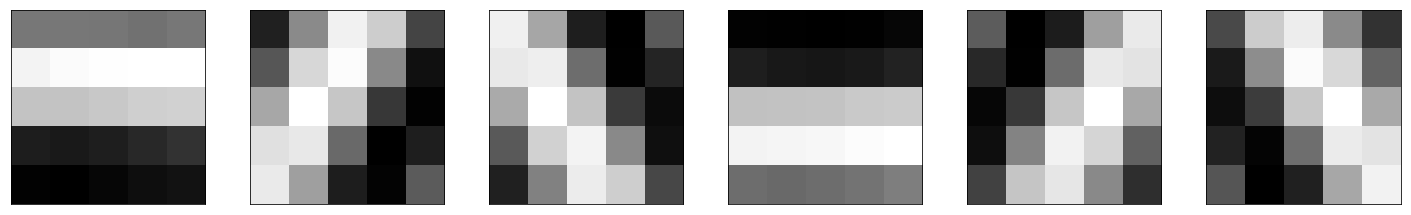

In [16]:
import matplotlib.pyplot as plt

weights = model.get_layer('c1').get_weights()[0]
fig = plt.figure(figsize = (25, 25))

for i in range(weights.shape[3]):
    y = plt.subplot(6, 6, i + 1)
    y.imshow(weights[:, :, 0, i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()

# Melakukan Pelatihan
Melakukan pelatihan pada CNN

In [15]:
ars.compile()
history = model.fit(X_train, Y_train_onehot, epochs = 5, verbose = 1, batch_size = 128, callbacks=[val_model, save_model, stop_train], initial_epoch=1)

Epoch 2/5
37500/37500 [==============================] - 55s 1ms/step - loss: 0.5412 - acc: 0.8551
Accuracy : 0.8775733333269755
Model saved to disk
Passes : 2/50
Epoch 3/5
37500/37500 [==============================] - 53s 1ms/step - loss: 0.3693 - acc: 0.8902
Accuracy : 0.8994133333269755
Model saved to disk
Passes : 3/50
Epoch 4/5
37500/37500 [==============================] - 56s 1ms/step - loss: 0.3111 - acc: 0.9035
Accuracy : 0.9092533333333334
Model saved to disk
Passes : 4/50
Epoch 5/5
37500/37500 [==============================] - 53s 1ms/step - loss: 0.2832 - acc: 0.9127
Accuracy : 0.9164266666793823
Model saved to disk
Passes : 5/50
